<a href="https://colab.research.google.com/github/gong-aipel/AIFFEL_quest-cr/blob/main/MainQuest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# 데이터 다운로드
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

100%|██████████| 2.29G/2.29G [00:35<00:00, 68.7MB/s]

Extracting files...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /root/.kagglehub/datasets/paultimothymooney/chest-xray-pneumonia "/content/drive/My Drive/kaggle_data"
print("✅ 데이터가 Google Drive로 이동 완료!")





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/root/.kagglehub/datasets/paultimothymooney/chest-xray-pneumonia': No such file or directory
✅ 데이터가 Google Drive로 이동 완료!


In [ ]:
import os

base_path = "/root/.kagglehub/datasets"
if os.path.exists(base_path):
    print("✅ 경로가 존재합니다:", base_path)
    print("📂 내부 폴더 목록:", os.listdir(base_path))
else:
    print("❌ 경로가 존재하지 않습니다:", base_path)

❌ 경로가 존재하지 않습니다: /root/.kagglehub/datasets


In [ ]:
import os

def print_directory_contents(path, indent=0):
    if os.path.isdir(path):
        print(" " * indent + f"[DIR] {os.path.basename(path)}")
        for item in os.listdir(path):
            print_directory_contents(os.path.join(path, item), indent + 2)
    else:
        print(" " * indent + f"[FILE] {os.path.basename(path)}")

print_directory_contents("/root/.kagglehub")

[FILE] .kagglehub


In [ ]:
import os

def print_directory_contents(path, indent=0):
    if os.path.isdir(path):
        print(" " * indent + f"[DIR] {os.path.basename(path)}")
        for item in os.listdir(path):
            print_directory_contents(os.path.join(path, item), indent + 2)
    else:
        print(" " * indent + f"[FILE] {os.path.basename(path)}")

print_directory_contents("/root/.kagglehub")

[FILE] .kagglehub


In [ ]:

print_directory_contents("/root/.kagglehub")

[FILE] .kagglehub


In [ ]:
import os
print("Is '/root/.kagglehub' a directory?", os.path.isdir("/root/.kagglehub"))

Is '/root/.kagglehub' a directory? False


In [ ]:
import kagglehub

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Returned path:", path)

Returned path: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
import os

returned_path = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"
print("Is returned path a directory?", os.path.isdir(returned_path))
print("Is returned path a file?", os.path.isfile(returned_path))

Is returned path a directory? True
Is returned path a file? False


In [ ]:
import os

data_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"

# 폴더 내부 리스트 출력
print("📂 데이터 폴더 목록:", os.listdir(data_dir))

# train, test, val 폴더 있는지 확인
for folder in ["train", "test", "val"]:
    path = os.path.join(data_dir, folder)
    if os.path.exists(path):
        print(f"✅ {folder} 폴더가 존재합니다. 파일 개수: {len(os.listdir(path))}")
    else:
        print(f"❌ {folder} 폴더가 없습니다.")


📂 데이터 폴더 목록: ['chest_xray']
❌ train 폴더가 없습니다.
❌ test 폴더가 없습니다.
❌ val 폴더가 없습니다.


In [ ]:
import os

data_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

# chest_xray 폴더 안의 파일 및 폴더 목록 출력
print("📂 chest_xray 폴더 목록:", os.listdir(data_dir))


📂 chest_xray 폴더 목록: ['chest_xray', 'val', 'train', '__MACOSX', 'test']


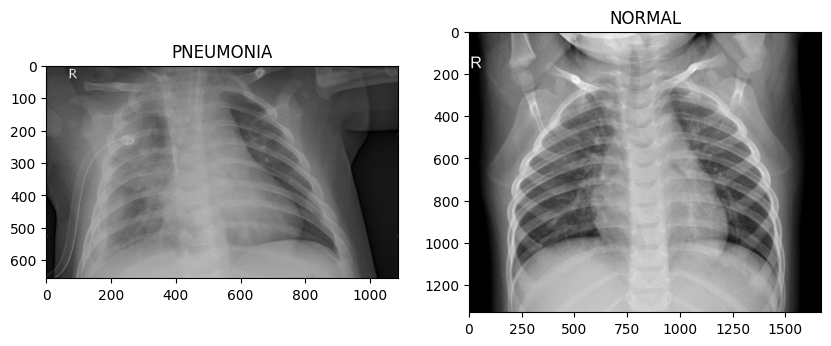

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

# 이미지 불러올 폴더 경로
pneumonia_path = os.path.join(data_dir, "train/PNEUMONIA")
normal_path = os.path.join(data_dir, "train/NORMAL")

# 이미지 파일 리스트 가져오기
pneumonia_images = os.listdir(pneumonia_path)
normal_images = os.listdir(normal_path)

# 샘플 이미지 불러오기
sample_pneumonia = os.path.join(pneumonia_path, random.choice(pneumonia_images))
sample_normal = os.path.join(normal_path, random.choice(normal_images))

# 이미지 읽기
img_pneumonia = cv2.imread(sample_pneumonia, cv2.IMREAD_GRAYSCALE)
img_normal = cv2.imread(sample_normal, cv2.IMREAD_GRAYSCALE)

# 이미지 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_pneumonia, cmap='gray')
plt.title("PNEUMONIA")

plt.subplot(1, 2, 2)
plt.imshow(img_normal, cmap='gray')
plt.title("NORMAL")

plt.show()


In [ ]:
def count_images_in_folder(folder_path):
    return len(os.listdir(folder_path))

train_pneumonia = count_images_in_folder(os.path.join(data_dir, "train/PNEUMONIA"))
train_normal = count_images_in_folder(os.path.join(data_dir, "train/NORMAL"))

test_pneumonia = count_images_in_folder(os.path.join(data_dir, "test/PNEUMONIA"))
test_normal = count_images_in_folder(os.path.join(data_dir, "test/NORMAL"))

val_pneumonia = count_images_in_folder(os.path.join(data_dir, "val/PNEUMONIA"))
val_normal = count_images_in_folder(os.path.join(data_dir, "val/NORMAL"))

print("📊 데이터 개수")
print(f"Train - PNEUMONIA: {train_pneumonia}, NORMAL: {train_normal}")
print(f"Test - PNEUMONIA: {test_pneumonia}, NORMAL: {test_normal}")
print(f"Validation - PNEUMONIA: {val_pneumonia}, NORMAL: {val_normal}")


📊 데이터 개수
Train - PNEUMONIA: 3875, NORMAL: 1341
Test - PNEUMONIA: 390, NORMAL: 234
Validation - PNEUMONIA: 8, NORMAL: 8


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 및 로딩 설정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, "train"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, "test"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CNN 베이스 모델 만들기
def create_base_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# 모델 생성
tf.random.set_seed(42)  # 재현성을 위해 시드 고정
base_model = create_base_model()
base_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 데이터 증강을 적용한 모델 만들기
def create_augmented_model():
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    model = create_base_model()
    return model, datagen

In [ ]:
# 모델 변경 (추가적인 Conv2D 레이어 추가)
def create_modified_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(256, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# ResNet-18 모델 구현
def create_resnet18():
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        input_shape=(150, 150, 3),
        weights=None
    )

    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# 모델 생성
tf.random.set_seed(42)  # 재현성을 위해 시드 고정
base_model = create_base_model()
augmented_model, datagen = create_augmented_model()
modified_model = create_modified_model()
resnet18_model = create_resnet18()

base_model.summary()
augmented_model.summary()
modified_model.summary()
resnet18_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 24,584,193 (93.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# 모델 학습 및 평가 함수
def train_and_evaluate(model, train_gen, test_gen, epochs=10):
    history = model.fit(train_gen, epochs=epochs, validation_data=test_gen)
    loss, accuracy = model.evaluate(test_gen)
    print(f"Test Accuracy: {accuracy:.4f}")
    return history

# 모델 생성 및 학습
tf.random.set_seed(42)  # 재현성을 위해 시드 고정
base_model = create_base_model()
augmented_model, datagen = create_augmented_model()
modified_model = create_modified_model()
resnet18_model = create_resnet18()

print("Training Base Model...")
train_and_evaluate(base_model, train_generator, test_generator)

print("Training Augmented Model...")
train_and_evaluate(augmented_model, train_generator, test_generator)

print("Training Modified Model...")
train_and_evaluate(modified_model, train_generator, test_generator)

print("Training ResNet-18 Model...")
train_and_evaluate(resnet18_model, train_generator, test_generator)

Training Base Model...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8205 - loss: 0.4692 - val_accuracy: 0.7612 - val_loss: 0.8487
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9674 - loss: 0.1010 - val_accuracy: 0.7532 - val_loss: 0.8663
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.9767 - loss: 0.0619 - val_accuracy: 0.6843 - val_loss: 1.5826
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9703 - loss: 0.0750 - val_accuracy: 0.7179 - val_loss: 1.2304
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.9792 - loss: 0.0594 - val_accuracy: 0.7356 - val_loss: 1.3645
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.9865 - loss: 0.0408 - val_accuracy: 0.7019 - val_loss: 2.6752
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.9841 - loss: 0.0401 - val_accuracy: 0.7804 - val_loss: 1.2938
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9905 - loss: 0.0213 - val_accu

1. 개요

  CNN 기본 모델부터 ResNet모델까지 돌려 본 결과 Resnet이 가장 좋은 결과를 보이고 있음


 2.목차

  -base model
  -Agument model
  - Modified Model
  -Renet model 각각 돌려보고 확인

 3. 각 모델을 비교한 결과 Resnet이 좋은 결과를 보여준다.

 4.회고
  너무 안돌아가서 LMS를 포기하고 코랩을 돌렸는데 코랩도 시간이 너무 걸리고 있다.

